## Importing libraries and Reading dataset(s)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as mno
sns.set_style("whitegrid", {"grid.color": ".2", "grid.linestyle": ":"})

from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)  #show all columns
pd.set_option('display.max_rows', None)  #show all columns

In [4]:
housing = pd.read_csv('../input/house-price-prediction/train.csv')
df = housing.copy()
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#statistical summary of all the numerical variables
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data Cleaning and Initial Preperation

In [8]:
#Check for duplicate values
df.duplicated().any()

False

In [9]:
#ID is a useless column, so addin to list of columns to be dropped
cols_to_drop = ['Id']

In [10]:
#checking missing values
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.shape[0]*100).round(2).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


<AxesSubplot:>

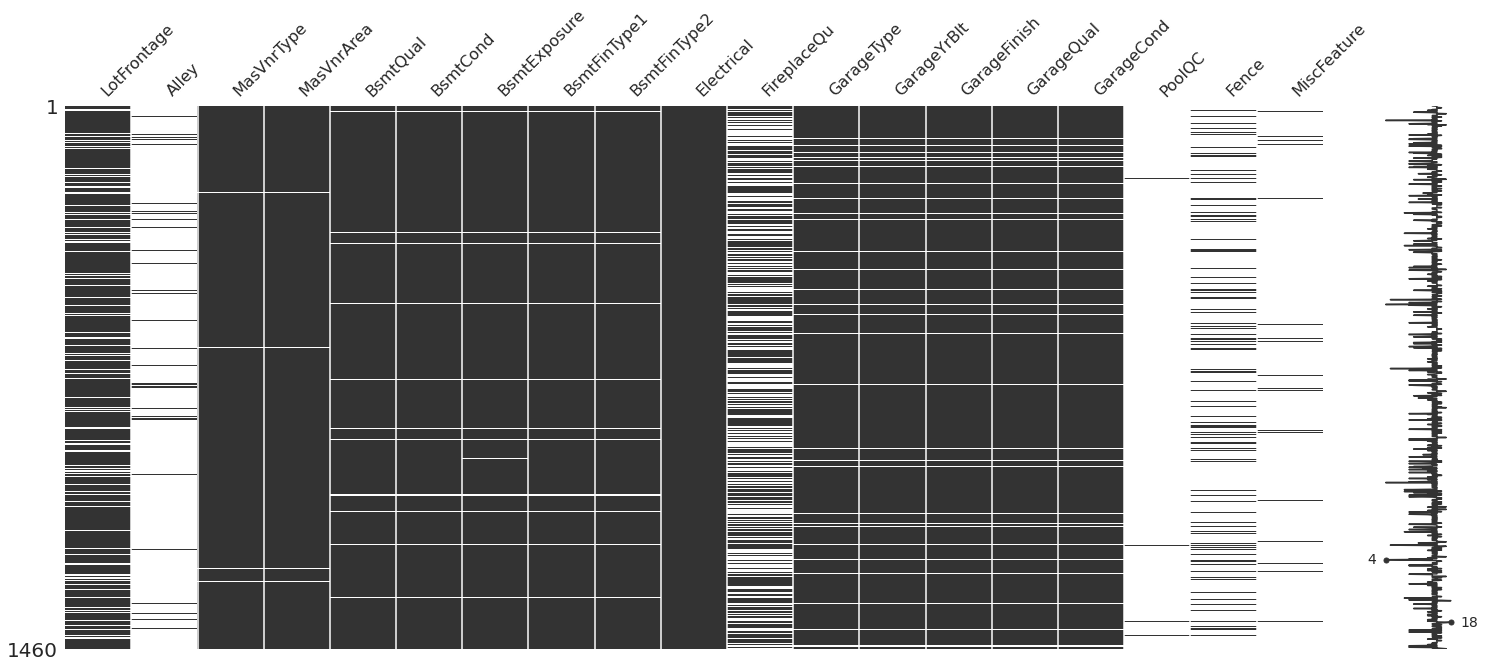

In [11]:
#visualizing columns with missing values
mno.matrix(df.loc[:, df.isna().any()], color = '0.2')

> Looks like values are not missing at random. Houses with no garage have NaN for all garage related feilds.

In [12]:
df.loc[:, df.isna().any()].columns

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

Data tpyes of columns with missing values.

In [13]:
df.loc[:, df.isna().any()].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [14]:
#Alley: Type of alley access to property
df['Alley'].value_counts(dropna = False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

> missing values in Alley indicate 'No alley access'. Replacing NaN with 'NA'

In [15]:
df['Alley'].fillna('NA', inplace = True)

In [16]:
#MasVnrType: Masonry veneer type
df['MasVnrType'].value_counts(dropna = False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

> It looks like MasVnrType has values missing at random. So, imputing mode here.

In [17]:
m = df['MasVnrType'].mode()[0]
df['MasVnrType'].fillna(m, inplace = True)

In [18]:
#BsmtQual: Evaluates the height of the basement
df['BsmtQual'].value_counts(dropna = False)

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

> Here missing values indicate No Basement. This applies to all the other basement related fields. Imputing 'NA'.

In [19]:
#basement related fields with missing values
cols = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']

#imputing 'NA' in place of NaN for the above columns where there is no basement
df.loc[df['TotalBsmtSF'] == 0, cols] = df.loc[df['TotalBsmtSF'] == 0, cols].fillna('NA')

In [20]:
for k in cols:
    print(df[k].value_counts(dropna = False), '\n')

TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: int64 

TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64 

No     953
Av     221
Gd     134
Mn     114
NA      37
NaN      1
Name: BsmtExposure, dtype: int64 

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: BsmtFinType1, dtype: int64 

Unf    1256
Rec      54
LwQ      46
NA       37
BLQ      33
ALQ      19
GLQ      14
NaN       1
Name: BsmtFinType2, dtype: int64 



In [21]:
#imputing mode of respective columns for the remaining missing values

df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0], inplace = True)
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0], inplace = True)

In [22]:
#Electrical: Electrical system
df['Electrical'].value_counts(dropna = False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [23]:
#imputing mode in Electrical system
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace = True) 

In [24]:
#FireplaceQu: Fireplace quality
df['FireplaceQu'].value_counts(dropna = False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

> missing values indicate no fireplace. Replacing NaN with 'NA'.

In [25]:
#imputing 'NA'
df['FireplaceQu'].fillna('NA', inplace = True)

In [26]:
df['GarageType'].value_counts(dropna = False)

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

> Missing values indicate no garage. Imputing 'NA'.

In [27]:
#GarageYrBlt: Year garage was built
df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [28]:
df[df['GarageYrBlt'].isna()].shape

(81, 81)

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

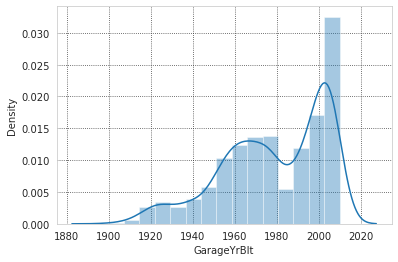

In [29]:
sns.distplot(df['GarageYrBlt'])

In [30]:
#garage related fields with missing values
cols = ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']

#imputing 'NA' in place of NaN for the above columns where there is no basement
df.loc[df['GarageArea'] == 0, cols] = df.loc[df['GarageArea'] == 0, cols].fillna('NA')

In [31]:
#Treating GarageYrBlt
def garageagefunc(x):
    if x == 'NA':
        return 'NA'
    elif int(x) < 2000:
        return 'Old'
    else:
        return 'New'

#Creating a new feature which which which tells if the garage is new or old
df['GarageAge'] = df['GarageYrBlt'].apply(garageagefunc)

#having created the new variable, the old one can be dropped later.
cols_to_drop.append('GarageYrBlt')

df['GarageAge'].value_counts()

Old    977
New    402
NA      81
Name: GarageAge, dtype: int64

In [32]:
#PoolQC: Pool quality
df['PoolQC'].value_counts(dropna = False)

NaN    1453
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64

> Missing values indicate no pool at the property. Imputing 'NA'. Since this columns has almost all the values belong to one category, 'NA'. Therefore, this column can be dropped.

In [33]:
cols_to_drop.append('PoolQC')
cols_to_drop

['Id', 'GarageYrBlt', 'PoolQC']

In [34]:
#Fence: Fence quality
df['Fence'].value_counts(dropna = False)

NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

> Missing values indicate no fence. Imputing 'NA'.

In [35]:
#imputing 'NA'
df['Fence'].fillna('NA', inplace = True)

In [36]:
#MiscFeature: Miscellaneous feature not covered in other categories
df['MiscFeature'].value_counts(dropna = False)

NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

> NaN values indicate no other misc feature. There are almost no misc features other than shed. This variable can be converted into, shed or no shed.

In [37]:
#changing the feature to shed or no shed
df['MiscFeature'] = df['MiscFeature'].map(lambda x: 1 if x == 'Shed' else 0)

#renaming the column
df = df.rename(columns = {'MiscFeature': 'Shed'})

df['Shed'].value_counts()

0    1411
1      49
Name: Shed, dtype: int64

In [38]:
#Changing MiscVal to shedval
df.loc[df['Shed'] == 0, 'MiscVal'] = 0

#renaming the column
df = df.rename(columns = {'MiscVal': 'ShedVal'})

<AxesSubplot:>

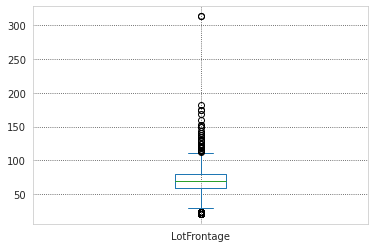

In [39]:
#LotFrontage: Linear feet of street connected to property
df['LotFrontage'].plot(kind = 'box')

In [40]:
#Imputing median in missing places in LOtFrontage
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace = True)

<AxesSubplot:>

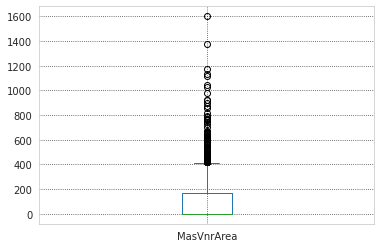

In [41]:
#MasVnrArea: Masonry veneer area in square feet
df['MasVnrArea'].plot(kind = 'box')

In [42]:
#imputing median, 0 corresponding to MaSVnrType, which is None
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace = True)

In [43]:
#dropping redundant columns
df.drop(cols_to_drop, axis = 1, inplace = True)

In [44]:
#checking for missing values again
df.isna().any().any()

False

> There are no missing values in data now.

In [45]:
#creating new feature 'HouseAge'
def houseagefunc(x):
    if int(x) < 2000:
        return 'Old'
    else:
        return 'New'

#Creating a new feature which which which tells if the property is new or old
df['HouseAge'] = df['YearBuilt'].apply(houseagefunc)

df['HouseAge'].value_counts()

Old    1072
New     388
Name: HouseAge, dtype: int64

### Outlier Analysis

In [46]:
#numerical columns
num_cols = df.select_dtypes(include = np.number).columns
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Shed',
       'ShedVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [47]:
#statistical description of numerical columns along with some specific percentiles
df[num_cols].describe(percentiles=[0.01, 0.95, 0.99, 0.999])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Shed,ShedVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,0.033562,23.420548,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,0.180160,156.394156,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
1%,20.000000,21.000000,1680.000000,3.000000,3.000000,1899.180000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,520.000000,0.000000,0.000000,692.180000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,61815.970000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,1.000000,652.800000,12.000000,2010.000000,442567.010000
99.9%,190.000000,252.871000,162062.060000,10.000000,9.000000,2009.000000,2010.000000,1282.528000,2226.952000,1123.787000,2138.312000,3203.246000,3186.690000,1847.214000,522.033000,4584.200000,2.000000,1.541000,3.000000,2.000000,6.000000,2.541000,12.000000,3.000000,4.000000,1374.394000,732.328000,513.361000,360.296000,367.067000,426.230000,614.952000,1.000000,2000.000000,12.000000,2010.000000,689920.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.0000

In [48]:
#Function for visualizing numerical variables, box plot
def box_plot(x):
    ax = sns.boxplot(y = df[x], color = 'darkcyan', showfliers = True, showmeans = True, 
                     meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"crimson"})
    ax.set_ylabel('')
    ax.set_title('{}'.format(x), fontsize = 14, fontweight = 'bold', pad = 5)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)

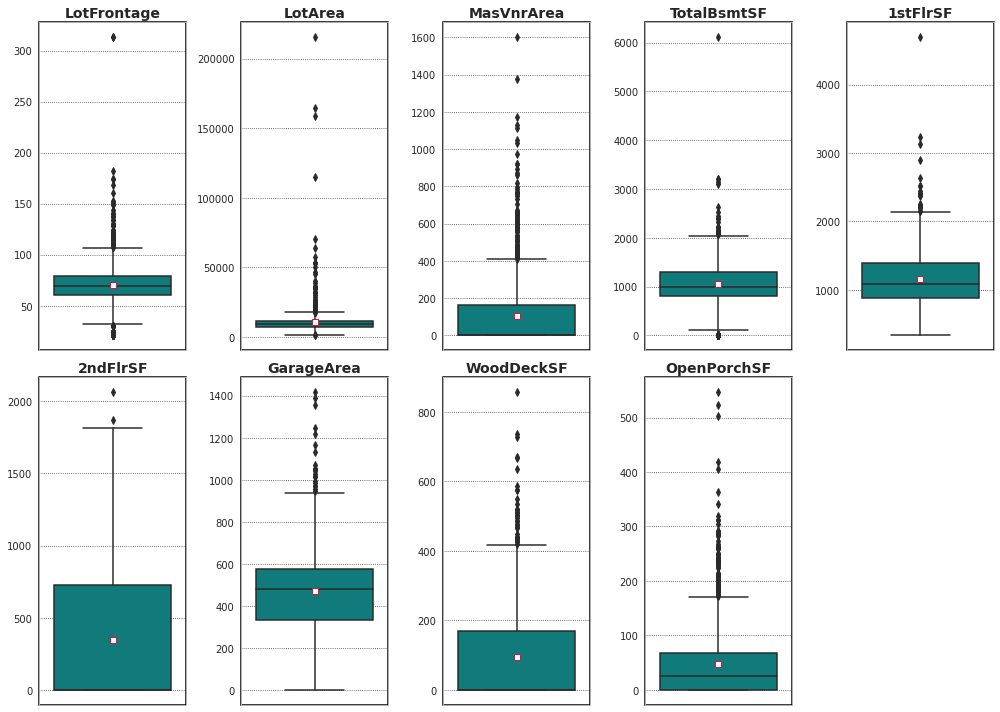

In [49]:
cols = ['LotFrontage', 'LotArea', 'MasVnrArea','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

plt.figure(figsize = [14,10])
for i in range(len(cols)):
    plt.subplot(2,5,i+1)
    box_plot(cols[i])
plt.tight_layout()

In [50]:
# Removing Outliers

#99th percentile values of important numerical variables with extreme outliers
ul_LotArea = df['LotArea'].quantile(0.99)
ul_LotFrontage = df['LotFrontage'].quantile(0.99)
ul_1stFlrSF = df['1stFlrSF'].quantile(0.99)
ul_MasVnrArea = df['MasVnrArea'].quantile(0.99)
ul_TotalBsmtSF = df['TotalBsmtSF'].quantile(0.99)
ul_WoodDeckSF = df['WoodDeckSF'].quantile(0.99)
ul_OpenPorchSF = df['OpenPorchSF'].quantile(0.99)

# Removing values beyond 99% for these variables
df = df[~((df["LotArea"] > ul_LotArea) | (df["LotFrontage"] > ul_LotFrontage) | (df["1stFlrSF"] > ul_1stFlrSF) | (df["MasVnrArea"] > ul_MasVnrArea) |
        (df["TotalBsmtSF"] > ul_TotalBsmtSF) | (df["WoodDeckSF"] > ul_WoodDeckSF) | (df["OpenPorchSF"] > ul_OpenPorchSF))]

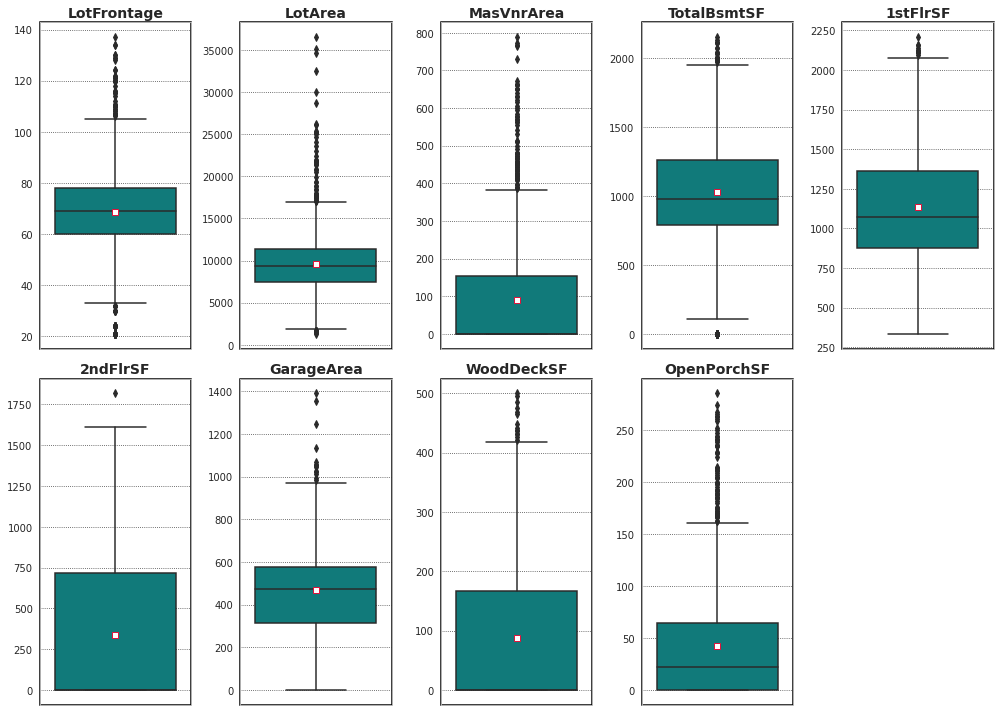

In [51]:
#visualizing same variables after outlier treatment

cols = ['LotFrontage', 'LotArea', 'MasVnrArea','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

plt.figure(figsize = [14,10])
for i in range(len(cols)):
    plt.subplot(2,5,i+1)
    box_plot(cols[i])
plt.tight_layout()

In [52]:
df.shape

(1382, 80)

#### Ordinal Encoding

Some of the variables like Quality and condition can be quantified by ordinally encoding.

In [53]:
df['ExterQual'].value_counts()

TA    872
Gd    458
Ex     38
Fa     14
Name: ExterQual, dtype: int64

In [54]:
#ordinally encoding these variables

df['ExterQual'] = df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
df['ExterCond'] = df['ExterCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})

df['BsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
df['BsmtCond'] = df['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})

df['HeatingQC'] = df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
df['KitchenQual'] = df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
df['FireplaceQu'] = df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})

Variables '**OverallQual**' and '**OverallCond**' are already ordinally enocoded. So, will keep it that way.

## Exploratory Data Analysis

In [55]:
from scipy.stats import norm

Text(0.5, 0, '')

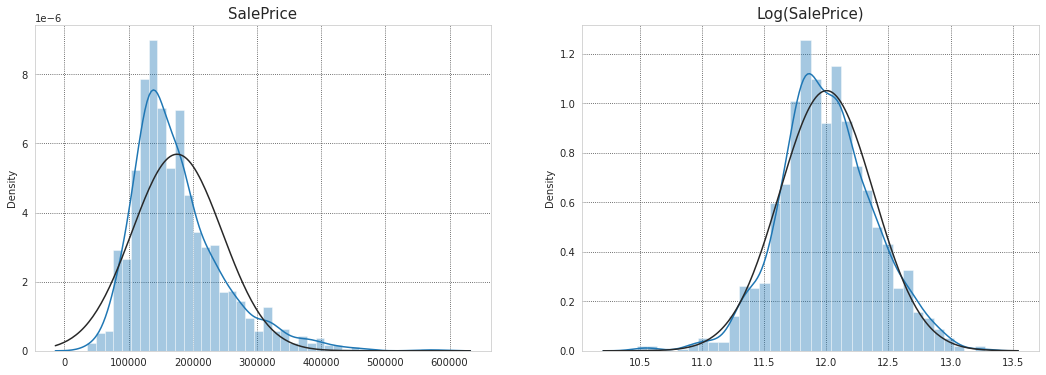

In [56]:
#visualizing Target

plt.figure(figsize = [18, 6])
plt.subplot(1,2,1)
sns.distplot(df['SalePrice'], fit = norm)
plt.title('SalePrice', fontsize = 15)
plt.xlabel('')

#visualizing log(Target)

plt.subplot(1,2,2)
sns.distplot(np.log(df['SalePrice']), fit = norm)
plt.title('Log(SalePrice)', fontsize = 15)
plt.xlabel('')

> The target variable, 'SalePrice' is slightly positively skewed.

In [57]:
#visualizing catagorical variables with repect to target

def box_plot2(x, y):
    ax = sns.boxplot(x = df[x], y = df[y], palette = 'Set2', showmeans = True,
                meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"crimson"})
    ax.set_ylabel('')
    ax.set_title('{}'.format(x), fontsize = 14, fontweight = 'bold', pad = 5)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)
    plt.title('{}'.format(x), fontsize = 16)

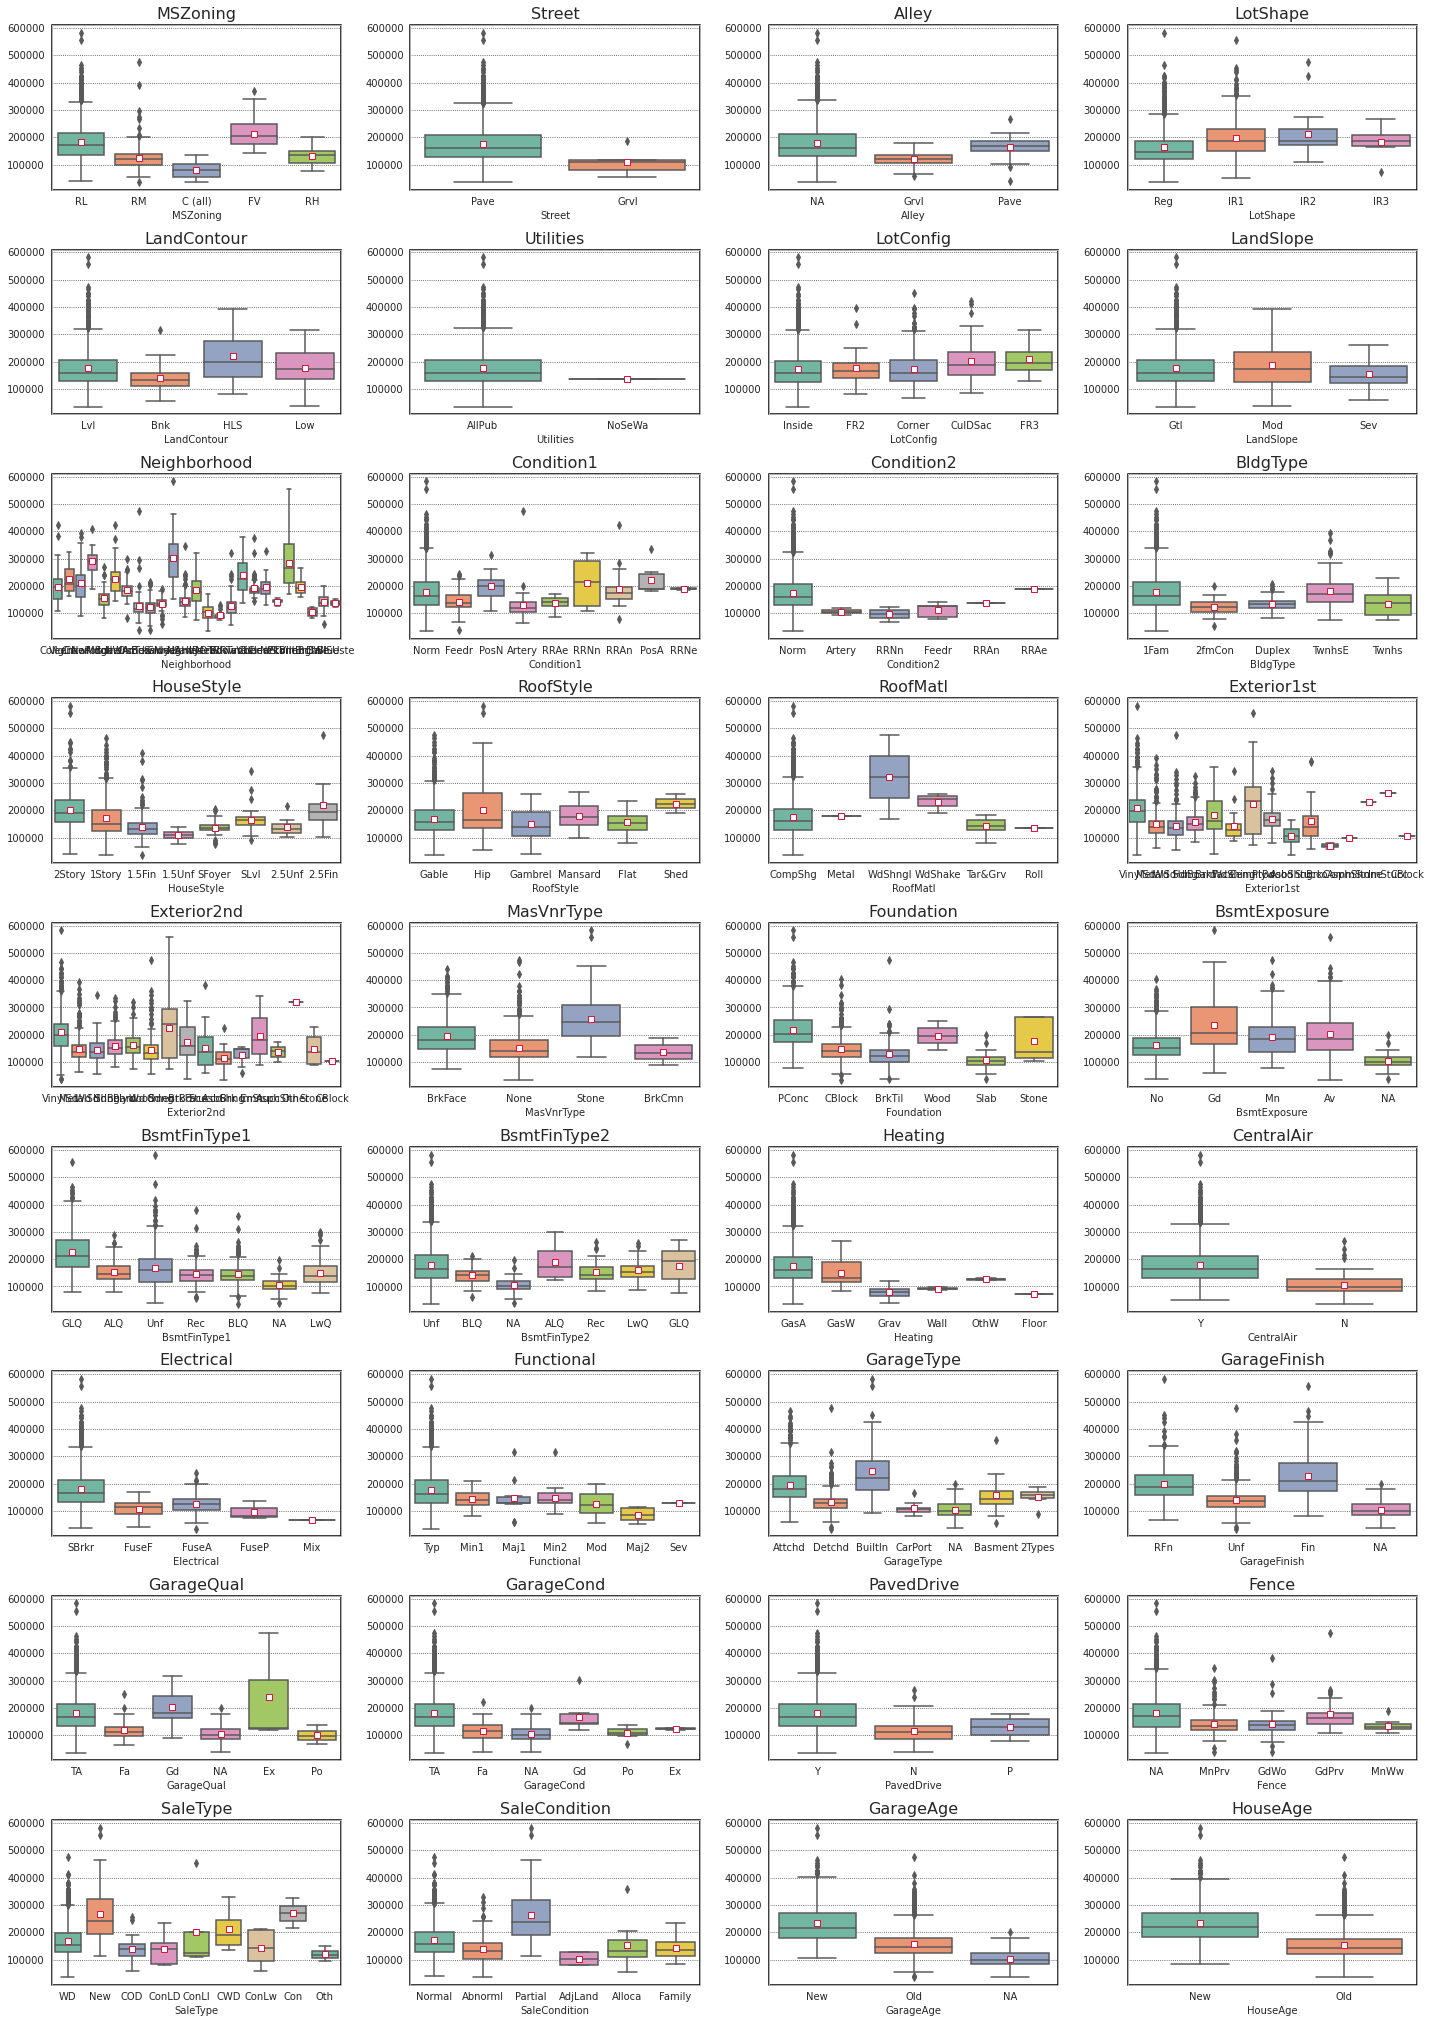

In [58]:
cat_cols = df.select_dtypes(exclude = np.number).columns

plt.figure(figsize = [20,34])
for i in range(len(cat_cols)):
    plt.subplot(11,4, i+1)
    box_plot2(cat_cols[i], 'SalePrice')
plt.tight_layout()
plt.show()

> It is quite clear that some of these variables have significant difference in saleprices of their categories, while others do not. The ones that do not are not important. This can be taken care of in feature selection.

In [59]:
#visualizing numerical varibles against SalePrice using scatter plot

#Function for visualizing numerical variables against SalePrice, scatterplot
def scatter_plot(x):
    ax = sns.scatterplot(x = df[x], y = df['SalePrice'], alpha = 0.35, linewidth = 0)
    ax.set_title('{} vs SalePrice'.format(x), fontsize = 12, pad = 5)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)

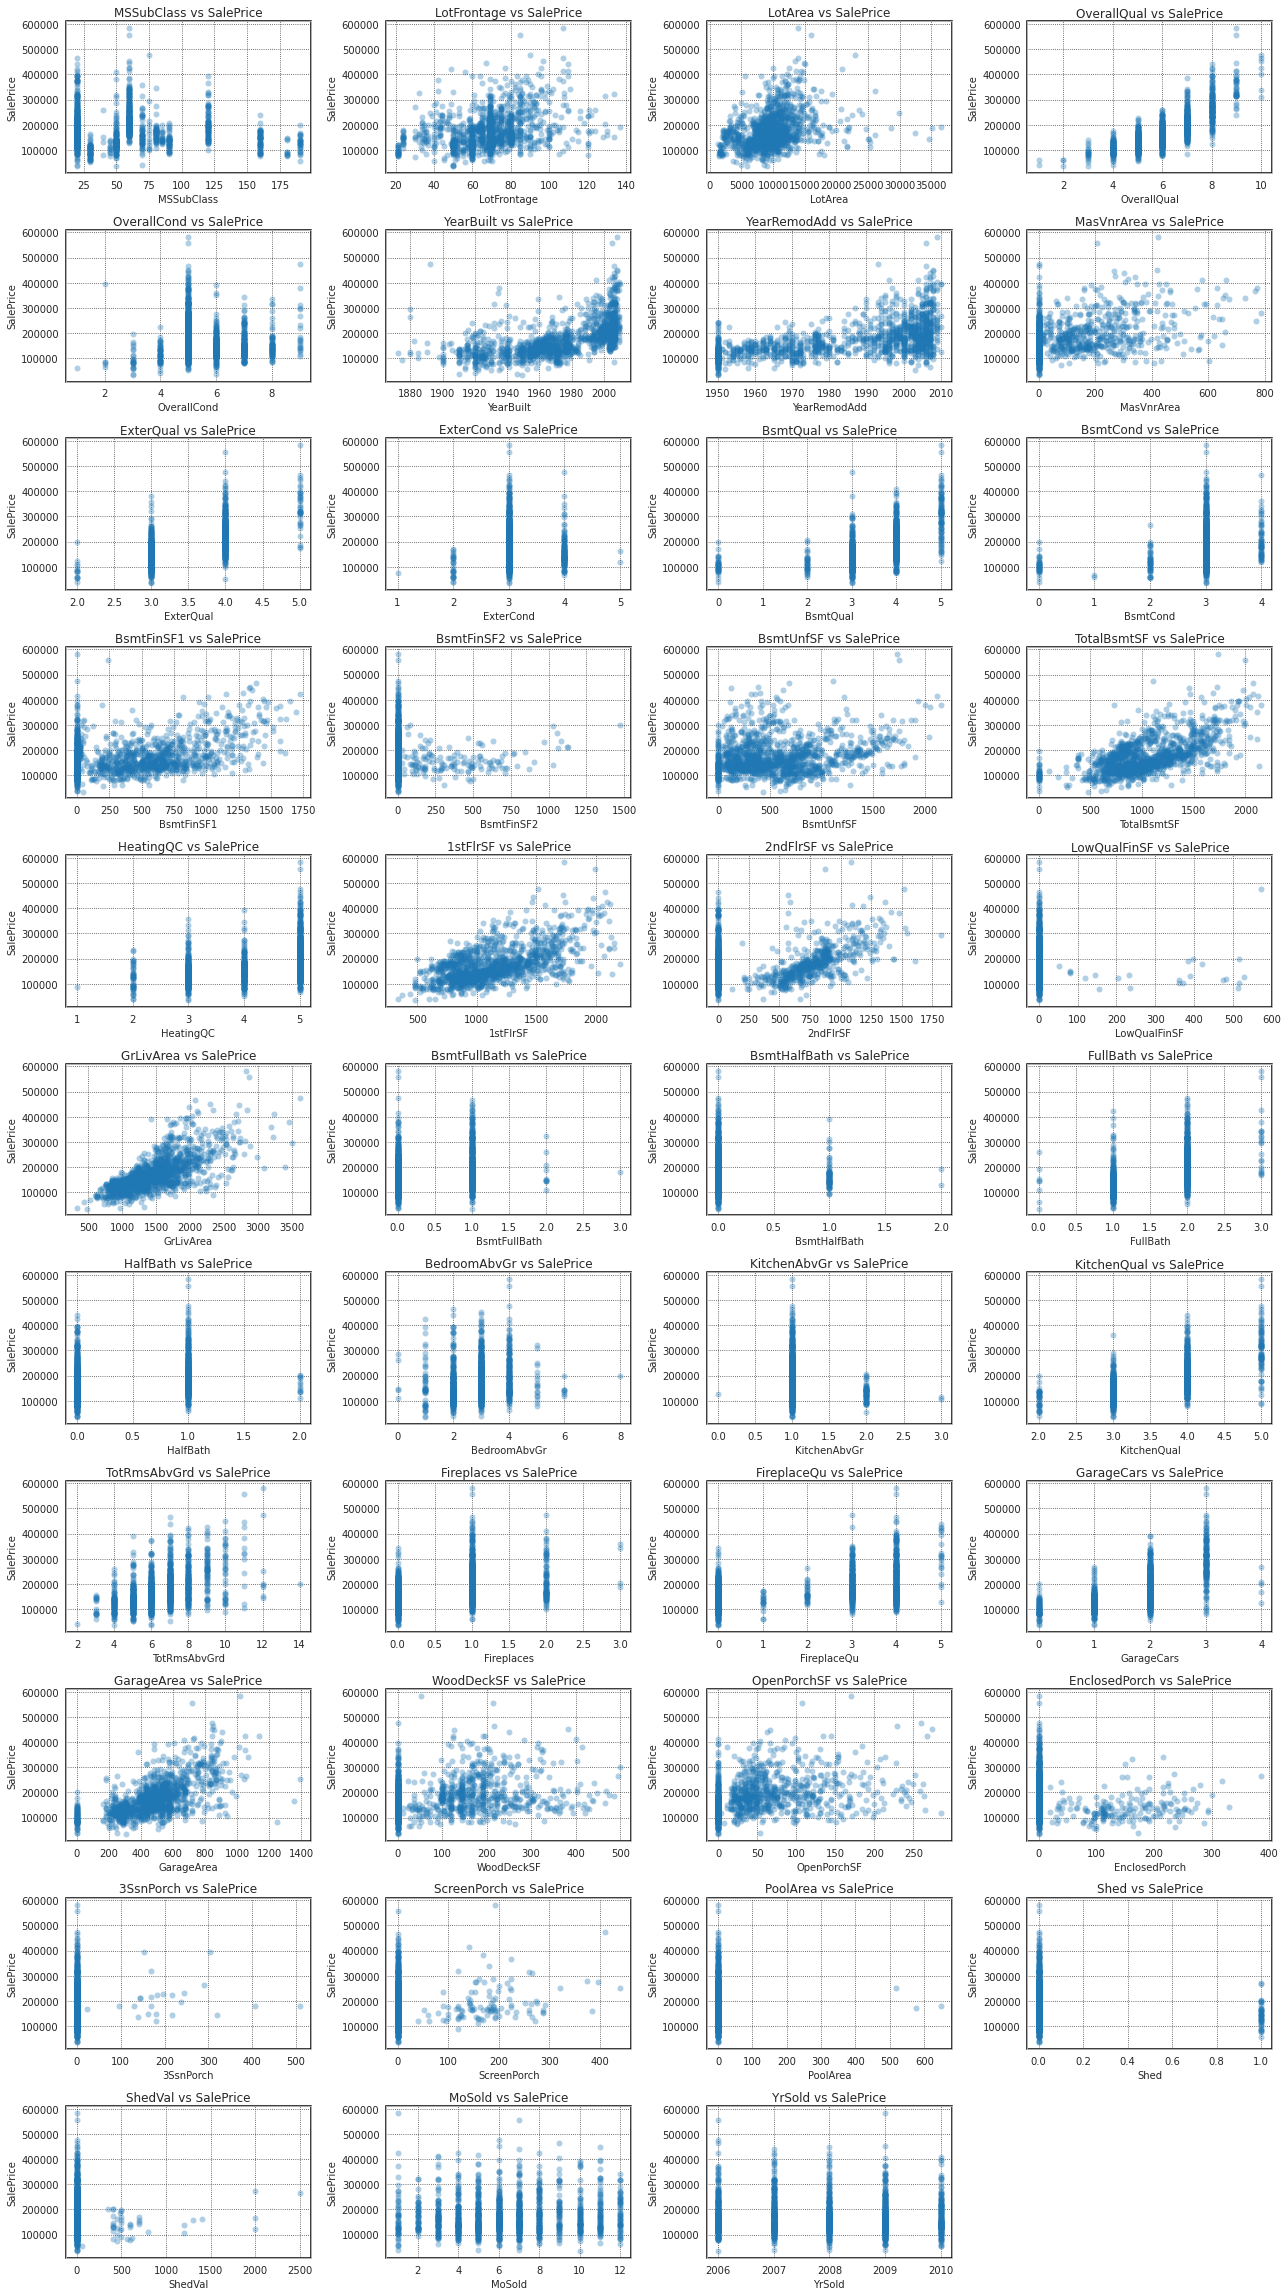

In [60]:
num_cols = [col for col in df.select_dtypes(include = np.number).columns if col != 'SalePrice']

plt.figure(figsize = [18,32])
for i in range(len(num_cols)):
    plt.subplot(11,4, i+1)
    scatter_plot(num_cols[i])
plt.tight_layout()
plt.show()

> Some of the binary and ordinal catagorical variables have also been visualised here.

> A clear increasing trend can be seen in many variables with SalePrice, almost linear in some cases.

> Newer houses tend to be more expensive. Houses with newly built garages are more expensive than houses with old garages, which are more expensive than houses with no garage.

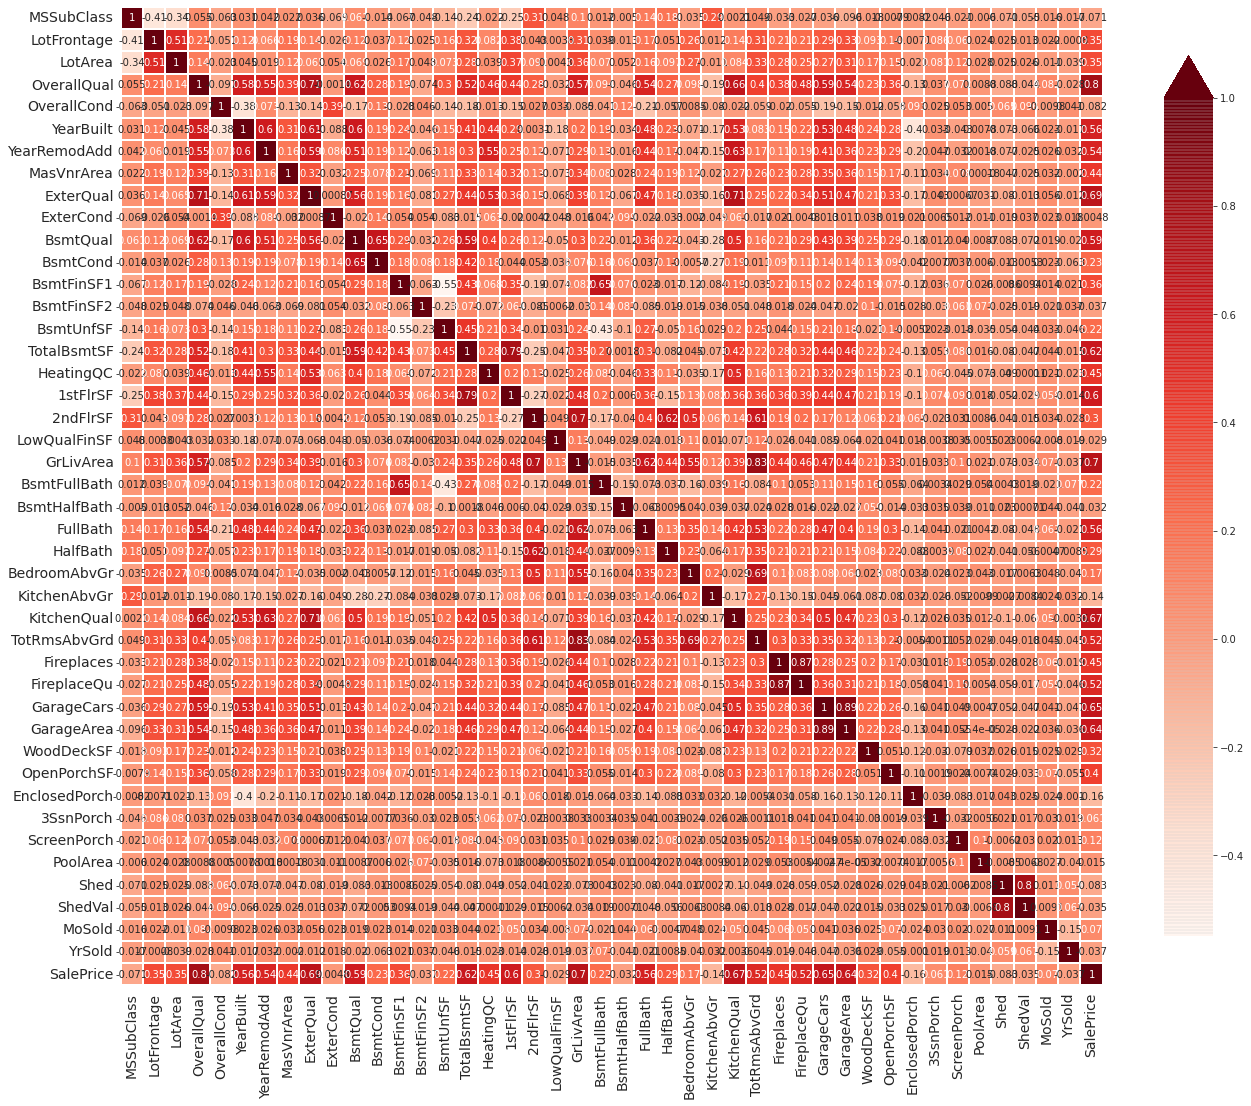

In [61]:
# visualizing correlation between numerical variables

plt.figure(figsize = [22,18])
cbar_kws={'orientation':'vertical', 'shrink':0.9,'extend':'max',
          'extendfrac':0.05, 'drawedges':True, 'pad':0.05, 'aspect':18}
sns.heatmap(df.corr(), annot = True, cmap = 'Reds', linecolor = 'w', linewidth = 0.2, cbar_kws = cbar_kws)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

> There are variables with high correlation. This can be taken care in feature selection.

In [62]:
#taking a look at YearRemodAdd

In [63]:
#fuction to check if the house was remodelled
def Remodelfunc(x):
    if x['YearRemodAdd'] == x['YearBuilt']:
        return 0   #no remodeling or additions
    else:
        return 1   #remodelled

df['RemodelYN'] = df.apply(Remodelfunc, axis = 1)
df['RemodelYN'].value_counts()

0    728
1    654
Name: RemodelYN, dtype: int64

<AxesSubplot:xlabel='RemodelYN', ylabel='SalePrice'>

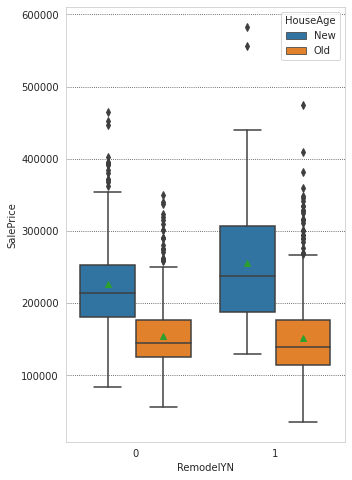

In [64]:
plt.figure(figsize = [5, 8])
sns.boxplot(x = df['RemodelYN'], y = df['SalePrice'], hue = df['HouseAge'], showmeans = True, showfliers = True)

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

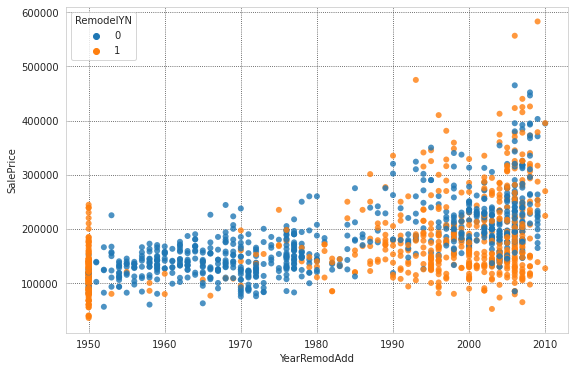

In [65]:
plt.figure(figsize = [9, 6])
sns.scatterplot(x = df['YearRemodAdd'], y = df['SalePrice'], hue = df['RemodelYN'], alpha = 0.8, linewidth = 0)

Text(0.5, 0, 'Age of Property when Sold')

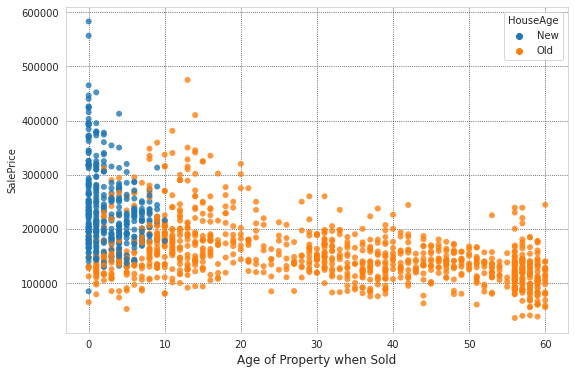

In [66]:
plt.figure(figsize = [9, 6])
sns.scatterplot((df['YrSold'] - df['YearRemodAdd']), df['SalePrice'], hue = df['HouseAge'], alpha = 0.8, linewidth = 0)
plt.xlabel('Age of Property when Sold', fontsize = 12)

> There appears to be a negetive correlation between age of the house from the year of building or remodelling of house to the year of selling and the the price at which the property was sold. We need not create this as a new feature as linear regression will take care of this.

## Data Preperation

In [67]:
#making a copy of df

dfm = df.copy()
dfm.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,Shed,ShedVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageAge,HouseAge,RemodelYN
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,No,GLQ,706,Unf,0,150,856,GasA,5,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,0,0,2,2008,WD,Normal,208500,New,New,0
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,Gd,ALQ,978,Unf,0,284,1262,GasA,5,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,0,0,5,2007,WD,Normal,181500,Old,Old,0
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,Mn,GLQ,486,Unf,0,434,920,GasA,5,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,3,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,0,0,9,2008,WD,Normal,223500,New,New,1
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,No,ALQ,216,Unf,0,540,756,GasA,4,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,0,0,2,2006,WD,Abnorml,140000,Old,Old,1
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,Av,GLQ,655,Unf,0,490,1145,GasA,5,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,3,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,0,0,12,2008,WD,Normal,250000,New,New,0


In [68]:
#binary catagorical features

bin_cols = [col for col in dfm.columns if dfm[col].nunique() == 2]
bin_cols

['Street', 'Utilities', 'CentralAir', 'Shed', 'HouseAge', 'RemodelYN']

'Street', 'Utilities' have almost all the values belonging to one category, therefore these columns are not useful for modeling.
These can be removed later in feature selection using RFE or RFECV.

In [69]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the binary mapping to binary columns
dfm['Street'] = dfm['Street'].map({'Pave': 1, "Grvl": 0})
dfm['Utilities'] = dfm['Utilities'].map({'AllPub': 1, "NoSeWa": 0})
dfm['HouseAge'] = dfm['HouseAge'].map({'New': 1, "Old": 0})
dfm['CentralAir'] = dfm['CentralAir'].map({'Y': 1, "N": 0})

In [70]:
dfm['MSSubClass'] = dfm['MSSubClass'].astype('object')

In [71]:
#other catagorical columns

cat_cols = dfm.select_dtypes(include = ['object', 'category']).columns
cat_cols

Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Electrical', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'Fence', 'SaleType', 'SaleCondition', 'GarageAge'],
      dtype='object')

In [72]:
# Creating dummy variables for the remaining categorical variables and dropping one level

dummy_df = pd.get_dummies(dfm[cat_cols], drop_first=True)
dummy_df.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageAge_New,GarageAge_Old
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,

In [73]:
#concatenating the dummy variables with main df
dfm = pd.concat([dfm, dummy_df], axis = 1)

In [74]:
#dropping the original catagorical variables as dummies have already been created
dfm = dfm.drop(cat_cols, axis = 1)

### Train - Test Split

In [75]:
# split into train and test
from sklearn.model_selection import train_test_split
dfm_train, dfm_test = train_test_split(dfm, train_size=0.7, test_size = 0.3, random_state=42)

In [76]:
dfm_train.shape, dfm_test.shape

((967, 246), (415, 246))

In [77]:
dfm_train.head()

,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Shed,ShedVal,MoSold,YrSold,SalePrice,HouseAge,RemodelYN,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageAge_New,GarageAge_Old
510,75.0,14559,1,1,5,7,1951,2000,70.0,4,3,3,3,650,180,178,1008,5,1,1363,0,0,1363,1,0,1,0,2,1,3,6,2,3,1,288,324,42,0,0,168,0,1,2000,6,2009,164900,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,

In [78]:
dfm_test.head()

,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Shed,ShedVal,MoSold,YrSold,SalePrice,HouseAge,RemodelYN,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageAge_New,GarageAge_Old
326,32.0,10846,1,1,8,5,1993,1993,0.0,4,3,4,3,1619,0,100,1719,5,1,1719,0,0,1719,2,0,1,1,1,1,4,6,2,4,2,473,122,30,0,0,0,0,0,0,5,2008,324000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0

### Feature Scaling

In [79]:
#numrical features

num_cols = [col for col in dfm.select_dtypes(include = np.number).columns if (col != 'SalePrice') & (col not in cat_cols) & (col not in bin_cols) & (col not in dummy_df.columns)]
num_cols

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'ShedVal',
 'MoSold',
 'YrSold']

In [80]:
#using standard scaler to standardise the numerical features

scaler = StandardScaler()
dfm_train[num_cols] = scaler.fit_transform(dfm_train[num_cols])
dfm_test[num_cols] = scaler.transform(dfm_test[num_cols])

## Model Building

In [81]:
#seperating features from target

X_train = dfm_train.drop('SalePrice', axis = 1)
y_train = dfm_train['SalePrice']
X_test = dfm_test.drop('SalePrice', axis = 1)
y_test = dfm_test['SalePrice']

In [82]:
#function for building linear regression model using statsmodel api
def build_model(cols):
    # Add a constant
    X_train_lm = sm.add_constant(X_train[cols])
    # fitting model to data
    lr = sm.OLS(y_train, X_train_lm).fit()
    return lr

In [83]:
lr = build_model(X_train.columns)

X_train_lm = sm.add_constant(X_train, has_constant='add')
y_train_pred = lr.predict(X_train_lm)
print('Train R2 score      : ', r2_score(y_train, y_train_pred).round(2))

X_test_lm = sm.add_constant(X_test, has_constant='add')
y_pred = lr.predict(X_test_lm)
print('Test R2 score       : ', r2_score(y_test, y_pred).round(2))

Train R2 score      :  0.94
Test R2 score       :  0.86


> There is a visible difference between scores on training ans test sets. This is a symptom of overfitting and can be rectified using intelligent feature selection and regularization.

<AxesSubplot:ylabel='Density'>

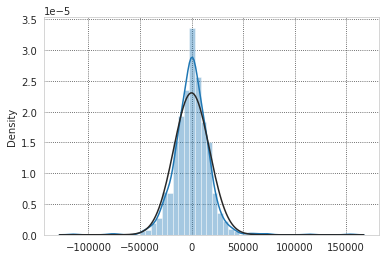

In [84]:
sns.distplot(y_train - y_train_pred, fit = norm)

> Error Terms seen to be more or less normally distributed.

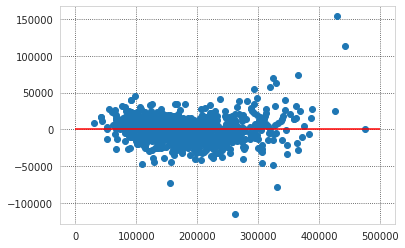

In [85]:
plt.scatter(y_train_pred, (y_train - y_train_pred))
plt.hlines(y = 0, xmin = 0, xmax = 500000, color = 'r')

> There seems to be some non-linearity in the error terms. It violates the assumption of linear regression that the error terms should be independent. This can be rectified by transforming regressor variables or target.

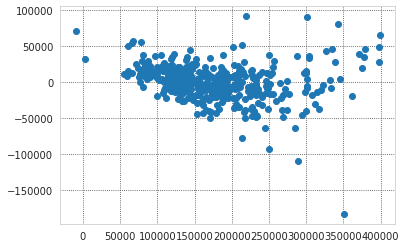

In [86]:
plt.scatter(y_pred, (y_test - y_pred))

### Transforming Target variable (Log transoformation)

In [87]:
#Logarithmic transformation of reponse

y_train_log = np.log(dfm_train['SalePrice'])
y_test_log = np.log(dfm_test['SalePrice'])

After transformation the regression eqaution becomes,

**log(y) = Xβ + ϵ**

In [88]:
#function for building linear regression model with transformed response using statsmodel api
def build_model(cols):
    # Add a constant
    X_train_lm = sm.add_constant(X_train[cols])
    # fitting model to data
    lr = sm.OLS(y_train_log, X_train_lm).fit()
    return lr

In [89]:
lr = build_model(X_train.columns)

X_train_lm = sm.add_constant(X_train, has_constant='add')
y_train_pred_log = lr.predict(X_train_lm)
print('Train R2 score      : ', r2_score(y_train_log, y_train_pred_log).round(2))

X_test_lm = sm.add_constant(X_test, has_constant='add')
y_pred_log = lr.predict(X_test_lm)
print('Test R2 score       : ', r2_score(y_test_log, y_pred_log).round(2))

Train R2 score      :  0.95
Test R2 score       :  0.86


Text(0, 0.5, 'Error')

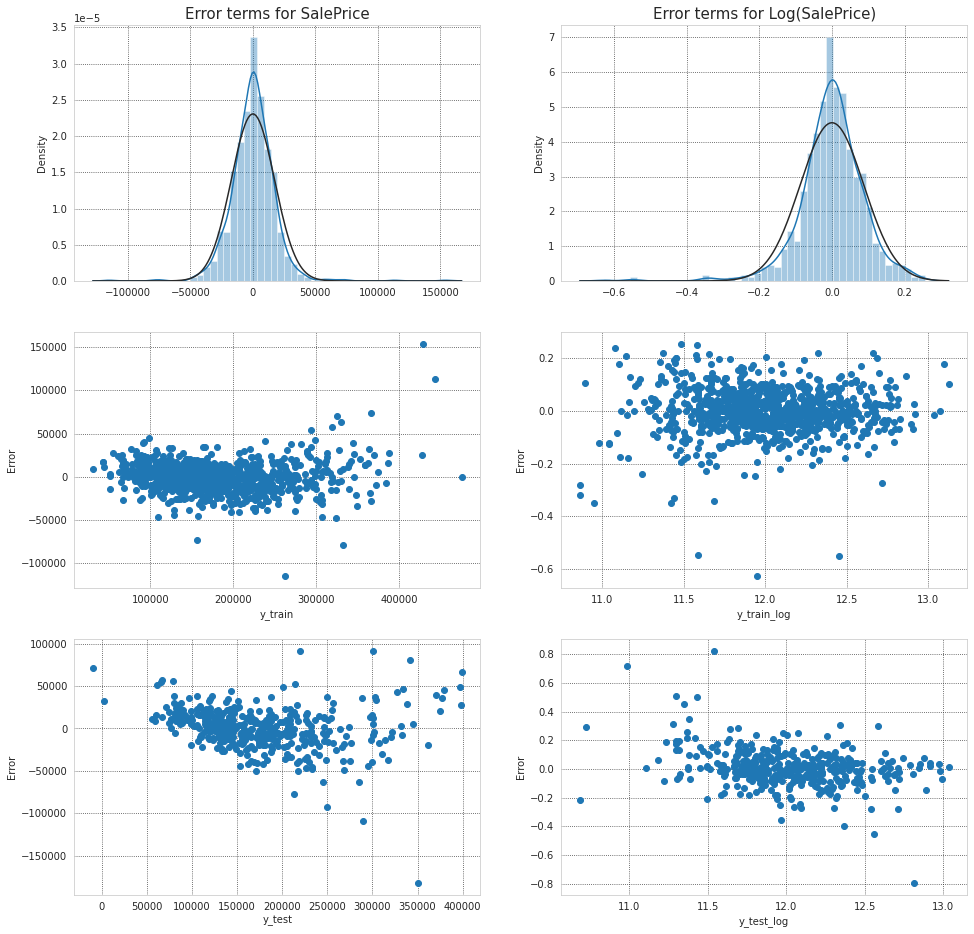

In [90]:
#comparing Error terms in the two cases

plt.figure(figsize = [16,16])

plt.subplot(3,2,1)
sns.distplot(y_train - y_train_pred, fit = norm)
plt.title('Error terms for SalePrice', fontsize = 15)
plt.xlabel('')

plt.subplot(3,2,2)
sns.distplot(y_train_log - y_train_pred_log, fit = norm)
plt.title('Error terms for Log(SalePrice)', fontsize = 15)
plt.xlabel('')

plt.subplot(3,2,3)
plt.scatter(y_train_pred, (y_train - y_train_pred))
plt.xlabel('y_train')
plt.ylabel('Error')

plt.subplot(3,2,4)
plt.scatter(y_train_pred_log, (y_train_log - y_train_pred_log))
plt.xlabel('y_train_log')
plt.ylabel('Error')

plt.subplot(3,2,5)
plt.scatter(y_pred, (y_test - y_pred))
plt.xlabel('y_test')
plt.ylabel('Error')

plt.subplot(3,2,6)
plt.scatter(y_pred_log, (y_test_log - y_pred_log))
plt.xlabel('y_test_log')
plt.ylabel('Error')

> There is visible difference in the trend of error term in the two cases. In case of transformed response, the error terms look randomly distributed.

In [91]:
y_train = y_train_log
y_test = y_test_log

#### Feature Selection using RFE (coarse tuning)

In [92]:
#importing utility
from sklearn.feature_selection import RFE

In [93]:
#Eliminating features using RFE
lm = LinearRegression()
selector = RFE(estimator = lm, n_features_to_select = 100)
selector.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=100)

In [94]:
L = list(zip(X_train.columns,selector.support_,selector.ranking_))
pd.DataFrame(L, columns = ['Features','rfe_support','rfe_ranking'])[selector.support_].sort_values('rfe_ranking')

,Features,rfe_support,rfe_ranking
4,OverallQual,True,1
192,Heating_Grav,True,1
191,Heating_GasW,True,1
190,Heating_GasA,True,1
187,BsmtFinType2_NA,True,1
184,BsmtFinType2_BLQ,True,1
181,BsmtFinType1_NA,True,1
180,BsmtFinType1_LwQ,True,1
176,BsmtExposure_NA,True,1
174,BsmtExposure_Gd,True,1


In [95]:
#features selected bt rfe

cols = X_train.columns[selector.support_]
cols

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_90',
       'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_FR3',
       'LandSlope_Sev', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Condition1_PosN', 'Condition1_RRAe',
       'Condition2_Feedr', 'Condition2_RRAe', 'Condition2_RRAn',
       'BldgType_2fmCon', 'BldgType_Duplex', 'HouseStyle_1.5Unf',
       'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&

In [96]:
#updated training and test sets
X_train_new = X_train[cols]
X_test_new = X_test[cols]

## Ridge Regression

In [97]:
# list of alphas to tune

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [98]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 6.0}


In [99]:
#mean train and test scores for different parameter values

cv_df = pd.DataFrame(model_cv.cv_results_)
cv_df = cv_df[cv_df['param_alpha'] < 100]
cv_df[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['param_alpha'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.073354,-0.092427,26
1,0.001,-0.073360,-0.092390,25
2,0.01,-0.073421,-0.092054,24
3,0.05,-0.073644,-0.090960,23
4,0.1,-0.073894,-0.090095,21
5,0.2,-0.074279,-0.089073,20
6,0.3,-0.074580,-0.088454,19
7,0.4,-0.074833,-0.088042,17
8,0.5,-0.075051,-0.087724,16
9,0.6,-0.075250,-0.087495,15


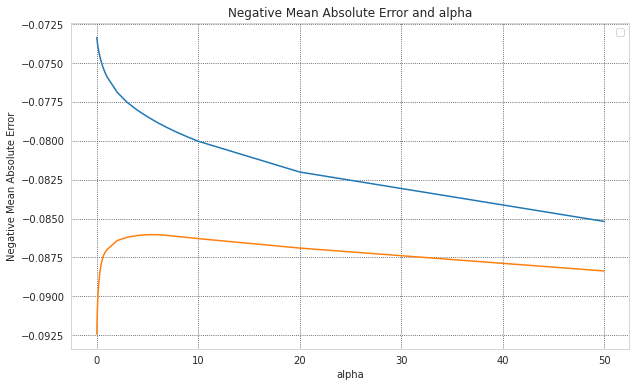

In [100]:
plt.figure(figsize = [10, 6])

plt.plot(cv_df['param_alpha'], cv_df['mean_train_score'])
plt.plot(cv_df['param_alpha'], cv_df['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(loc='upper right')
plt.show()

#### Fine tuning using Gridsearch

In [101]:
#fine tuning in a tighter range to find the best value of alpha

# list of alphas to tune

params = {'alpha': np.arange(2,5,0.1)}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2,
       3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5,
       4.6, 4.7, 4.8, 4.9])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [102]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 4.900000000000002}


In [103]:
# Ridge Model for best param
ridge = Ridge(alpha=4.9)
ridge.fit(X_train_new, y_train)

y_train_pred_ridge = ridge.predict(X_train_new)
print('Train R2 Score      : ', round(r2_score(y_train, y_train_pred_ridge),4))
#MAE and RMSE
print('Train MAE           : ', round(mean_absolute_error(y_train, y_train_pred_ridge),2))
print('Train RMSE          : ', round(mean_squared_error(y_train, y_train_pred_ridge, squared = False),2), '\n')

y_test_pred_ridge = ridge.predict(X_test_new)
print('Test R2 Score       : ', round(r2_score(y_test, y_test_pred_ridge),4))
#MAE and RMSE
print('Test MAE            : ', round(mean_absolute_error(y_test, y_test_pred_ridge),2))
print('Test RMSE           : ', round(mean_squared_error(y_test, y_test_pred_ridge, squared = False),2))

Train R2 Score      :  0.9202
Train MAE           :  0.08
Train RMSE          :  0.11 

Test R2 Score       :  0.9078
Test MAE            :  0.08
Test RMSE           :  0.11


In [104]:
ridge.coef_

array([ 0.08299266,  0.05636249,  0.08561338,  0.0460477 ,  0.01783249,
       -0.0004137 ,  0.05515525,  0.06658606,  0.04997246,  0.05490091,
        0.00645726,  0.08600401, -0.01748327,  0.03089739,  0.03265889,
        0.05498707,  0.02439397, -0.024703  , -0.09676562, -0.05065936,
       -0.01519086,  0.12236124,  0.04715234,  0.06867414,  0.00623973,
       -0.01669157, -0.00022969,  0.03882582,  0.10545631, -0.04418458,
       -0.03892691,  0.0705928 ,  0.07511438,  0.02680912, -0.05463204,
        0.00240181, -0.0208863 ,  0.        ,  0.00763823, -0.024703  ,
        0.00400751, -0.03188863, -0.01037476,  0.01826488, -0.07323094,
        0.0163156 ,  0.05307464,  0.00905385,  0.03720667,  0.00521713,
       -0.06068471, -0.00707139,  0.05346945, -0.00690614, -0.0477768 ,
        0.04942278, -0.02200861,  0.01343327, -0.00690614,  0.00746358,
       -0.02200861, -0.02007935,  0.0520716 ,  0.05091782,  0.07019571,
        0.01660266, -0.05050665,  0.01660266, -0.04940035,  0.01

In [105]:
ridge_df = pd.DataFrame({'Features': ridge.feature_names_in_, 'Coefficients': ridge.coef_})
ridge_df.sort_values('Coefficients', ascending = False)

,Features,Coefficients
21,MSZoning_FV,0.122361
97,SaleCondition_Partial,0.121951
28,Neighborhood_Crawfor,0.105456
11,GrLivArea,0.086004
2,YearBuilt,0.085613
0,OverallQual,0.082993
32,Neighborhood_StoneBr,0.075114
31,Neighborhood_NridgHt,0.070593
64,BsmtExposure_Gd,0.070196
23,MSZoning_RL,0.068674


There are still a lot of variable to draw inference from.
* The goal of this study is to design a predictive model with can predict the price of the house for the given context, given a set of features.

* The other more important goal of making a model is for inferencial reason, i.e, the model will be used to explore the strength of the relationships between the response and the predictors.

For this reason, an intelligent way of feature elimination must be implemented without compromising much on the model performance. **Lasso** should perform better in situations where only a few among all the predictors that are used to build our model have a significant influence on the response variable. So, it also acts as feature selection method, which removes the unrelated variables.

## Lasso Regression

In [106]:
# list of alphas to tune

params = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [107]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [108]:
#mean train and test scores for different parameter values

cv_df = pd.DataFrame(model_cv.cv_results_)
cv_df = cv_df[cv_df['param_alpha'] < 10]
cv_df[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['param_alpha'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.00001,-0.073516,-0.092561,3
1,0.0001,-0.075601,-0.088521,2
2,0.001,-0.082884,-0.087483,1
3,0.01,-0.100544,-0.102220,4
4,0.05,-0.122807,-0.123606,5
5,0.1,-0.155097,-0.155617,6
6,0.2,-0.229338,-0.229767,7
7,0.3,-0.292798,-0.293139,8
8,0.4,-0.303713,-0.303842,9
9,0.5,-0.303713,-0.303842,9


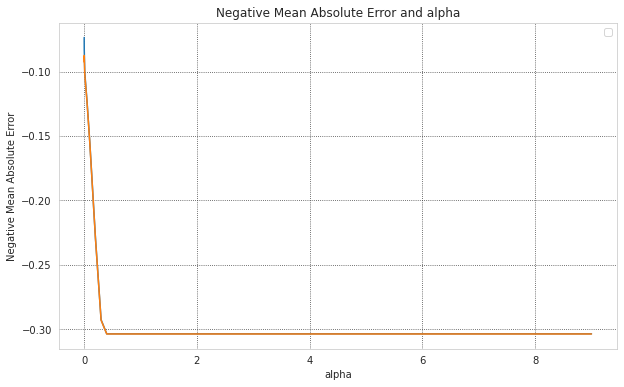

In [109]:
plt.figure(figsize = [10, 6])

plt.plot(cv_df['param_alpha'], cv_df['mean_train_score'])
plt.plot(cv_df['param_alpha'], cv_df['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(loc='upper right')
plt.show()

#### Fine tuning using Gridsearch

In [110]:
#fine tuning in a tighter range to find the best value of alpha

# list of alphas to tune

params = {'alpha': np.arange(0,0.002,0.00001)}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.00e+00, 1.00e-05, 2.00e-05, 3.00e-05, 4.00e-05, 5.00e-05,
       6.00e-05, 7.00e-05, 8.00e-05, 9.00e-05, 1.00e-04, 1.10e-04,
       1.20e-04, 1.30e-04, 1.40e-04, 1.50e-04, 1.60e-04, 1.70e-04,
       1.80e-04, 1.90e-04, 2.00e-04, 2.10e-04, 2.20e-04, 2.30e-04,
       2.40e-04, 2.50e-04, 2.60e-04, 2.70e-04, 2.80e-04, 2.90e-04,
       3.00e-04, 3.10e-04...
       1.68e-03, 1.69e-03, 1.70e-03, 1.71e-03, 1.72e-03, 1.73e-03,
       1.74e-03, 1.75e-03, 1.76e-03, 1.77e-03, 1.78e-03, 1.79e-03,
       1.80e-03, 1.81e-03, 1.82e-03, 1.83e-03, 1.84e-03, 1.85e-03,
       1.86e-03, 1.87e-03, 1.88e-03, 1.89e-03, 1.90e-03, 1.91e-03,
       1.92e-03, 1.93e-03, 1.94e-03, 1.95e-03, 1.96e-03, 1.97e-03,
       1.98e-03, 1.99e-03])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [111]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0005600000000000001}


In [112]:
# Lasso Model for best param
lasso = Lasso(alpha=0.00066)
lasso.fit(X_train_new, y_train)

y_train_pred_lasso = lasso.predict(X_train_new)
print('Train R2 Score      : ', round(r2_score(y_train, y_train_pred_lasso),4))
#MAE and RMSE
print('Train MAE           : ', round(mean_absolute_error(y_train, y_train_pred_lasso),4))
print('Train RMSE          : ', round(mean_squared_error(y_train, y_train_pred_lasso, squared = False),4), '\n')

y_test_pred_lasso = lasso.predict(X_test_new)
print('Test R2 Score       : ', round(r2_score(y_test, y_test_pred_lasso),4))
#MAE and RMSE
print('Test MAE            : ', round(mean_absolute_error(y_test, y_test_pred_lasso),4))
print('Test RMSE           : ', round(mean_squared_error(y_test, y_test_pred_lasso, squared = False),4))

Train R2 Score      :  0.9127
Train MAE           :  0.0817
Train RMSE          :  0.1145 

Test R2 Score       :  0.9123
Test MAE            :  0.0783
Test RMSE           :  0.1067


Lasso surely out-performs ridge when it comes to prediction on unseen data (test set). Regression loss is almost identical.

Now, instead of using the most most optimal alpha value, we can push it a little higher for it to perform feature selection. It also acts as feature selection method, which removes the unrelated variables.

### Selecting Most Important features using Lasso

In [113]:
# Lasso Model for best param
lasso = Lasso(alpha=0.008)
lasso.fit(X_train_new, y_train)

y_train_pred_lasso = lasso.predict(X_train_new)
print('Train R2 Score      : ', round(r2_score(y_train, y_train_pred_lasso),4))
#MAE and RMSE
print('Train MAE           : ', round(mean_absolute_error(y_train, y_train_pred_lasso),4))
print('Train RMSE          : ', round(mean_squared_error(y_train, y_train_pred_lasso, squared = False),4), '\n')

y_test_pred_lasso = lasso.predict(X_test_new)
print('Test R2 Score       : ', round(r2_score(y_test, y_test_pred_lasso),4))
#MAE and RMSE
print('Test MAE            : ', round(mean_absolute_error(y_test, y_test_pred_lasso),4))
print('Test RMSE           : ', round(mean_squared_error(y_test, y_test_pred_lasso, squared = False),4))

Train R2 Score      :  0.8742
Train MAE           :  0.0995
Train RMSE          :  0.1375 

Test R2 Score       :  0.8849
Test MAE            :  0.0908
Test RMSE           :  0.1223


In [114]:
lasso.coef_

array([ 0.12014983,  0.05731904,  0.10651263,  0.03958524,  0.00134276,
       -0.        ,  0.05419507,  0.        ,  0.01577784,  0.        ,
       -0.00029763,  0.14491079, -0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.01451334, -0.0099856 ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.02303707,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.  

In [115]:
lasso_df = pd.DataFrame({'Features': lasso.feature_names_in_, 'Coefficients': lasso.coef_})
lasso_df = lasso_df[lasso_df.Coefficients != 0].sort_values('Coefficients', ascending = False).reset_index().drop('index', axis = 1)
lasso_df

,Features,Coefficients
0,GrLivArea,0.144911
1,OverallQual,0.120150
2,YearBuilt,0.106513
3,OverallCond,0.057319
4,TotalBsmtSF,0.054195
5,BsmtFinSF1,0.039585
6,Foundation_PConc,0.023037
7,1stFlrSF,0.015778
8,MSZoning_RL,0.014513
9,BsmtFinSF2,0.001343


In [116]:
#function to check for the VIF values of the feature variables. 
def get_vif(cols):
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [117]:
get_vif(lasso_df['Features'])

,Features,VIF
10,GarageCond_TA,8.03
8,MSZoning_RL,7.13
6,Foundation_PConc,3.50
4,TotalBsmtSF,3.25
7,1stFlrSF,3.03
1,OverallQual,2.84
2,YearBuilt,2.76
12,MSZoning_RM,2.46
0,GrLivArea,1.91
5,BsmtFinSF1,1.30


## ElasticNet Regression

Elastic net is a regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods.

In [118]:
# list of alphas to tune

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ],
          'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}


en = ElasticNet()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = en, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs=-1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [119]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001, 'l1_ratio': 0.3}


In [120]:
# ElasticNet Model for best param
en = ElasticNet(alpha=0.001, l1_ratio = 0.3)
en.fit(X_train_new, y_train)

y_train_pred_en = en.predict(X_train_new)
print('Train R2 Score      : ', round(r2_score(y_train, y_train_pred_en),4))
#MAE and RMSE
print('Train MAE           : ', round(mean_absolute_error(y_train, y_train_pred_en),4))
print('Train RMSE          : ', round(mean_squared_error(y_train, y_train_pred_en, squared = False),4), '\n')

y_test_pred_en = en.predict(X_test_new)
print('Test R2 Score       : ', round(r2_score(y_test, y_test_pred_en),4))
#MAE and RMSE
print('Test MAE            : ', round(mean_absolute_error(y_test, y_test_pred_en),4))
print('Test RMSE           : ', round(mean_squared_error(y_test, y_test_pred_en, squared = False),4))

Train R2 Score      :  0.9185
Train MAE           :  0.0797
Train RMSE          :  0.1106 

Test R2 Score       :  0.9105
Test MAE            :  0.0795
Test RMSE           :  0.1078


## Conclusion

Final Observations on performance of differenct models.

**Ridge:**
> * Train R2 Score      :  0.9195
* Train MAE           :  0.08
* Train RMSE          :  0.11 

> * Test R2 Score       :  0.9059
* Test MAE            :  0.08
* Test RMSE           :  0.11

**Lasso**
> * Train R2 Score      :  0.9122
* Train MAE           :  0.0821
* Train RMSE          :  0.1148 

> * Test R2 Score       :  0.9113
* Test MAE            :  0.0786
* Test RMSE           :  0.1073

**ElasticNet**
> * Train R2 Score      :  0.9177
* Train MAE           :  0.0803
* Train RMSE          :  0.1112 

> * Test R2 Score       :  0.9084
* Test MAE            :  0.0802
* Test RMSE           :  0.109

Considering performance on test set, Lasso has performed slightly better than others.

Further, Lasso was used with a different value of alpha for intelligent feature selection, and reduced the number of variables down to 13 most important variables.

According to the final model, the variables that impact the price of house are,

In [121]:
lasso_df = lasso_df.sort_values('Coefficients')
lasso_df

,Features,Coefficients
12,MSZoning_RM,-0.009986
11,LowQualFinSF,-0.000298
10,GarageCond_TA,0.000514
9,BsmtFinSF2,0.001343
8,MSZoning_RL,0.014513
7,1stFlrSF,0.015778
6,Foundation_PConc,0.023037
5,BsmtFinSF1,0.039585
4,TotalBsmtSF,0.054195
3,OverallCond,0.057319


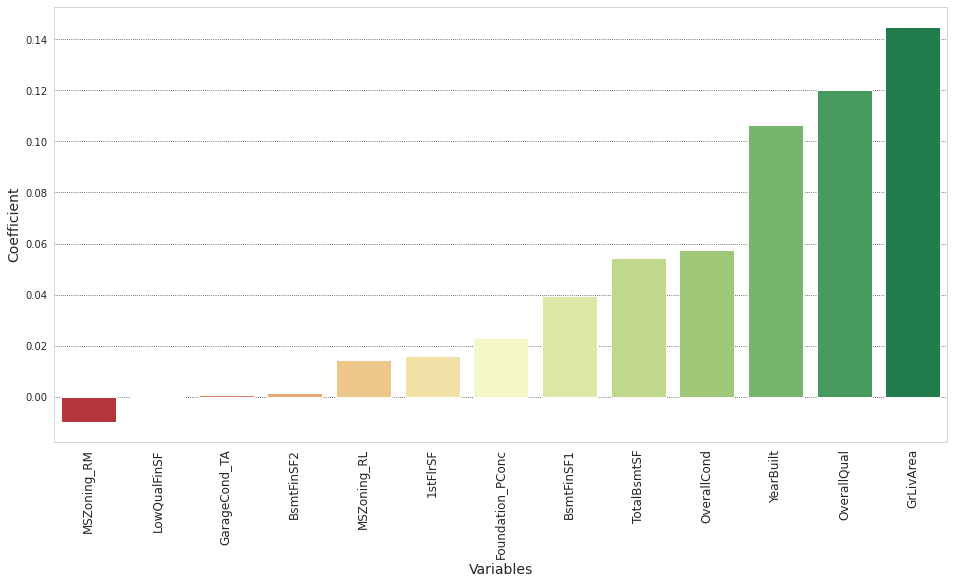

In [122]:
#visualizing coefficients of most important features

plt.figure(figsize = [16,8])
sns.barplot(lasso_df['Features'], lasso_df['Coefficients'], palette = 'RdYlGn')
plt.ylabel('Coefficient', fontsize = 14)
plt.xlabel('Variables', fontsize = 14)
plt.xticks(fontsize = 12, rotation = 90)

plt.show()

A non-linear relationship has been established between the resgressors and the resposnse. Considering the final model, the price of houses are influenced by Above grade (ground) living area, Overall quality oh house (i.e, quality of material finish, etc), Age of property, Overall condition of the house, basement size, and Zoning classification of the sale.